In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.preprocessing import scale
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import linkage

In [24]:
path=r"C:\Users\win10\Desktop\DATA SCIENCE\ExcelR\Assignment Given (Untouched)\4)Clustering\Assignment Given\EastWestAirlines.csv"

In [25]:
path=path.replace("\\", "/")

In [26]:
df=pd.read_csv(path)

In [27]:
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [28]:
#Check for null values 
df.isnull().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [29]:
df_new=scale(df.iloc[:,1:])

In [30]:
z=linkage(df_new,method='complete',metric='euclidean')

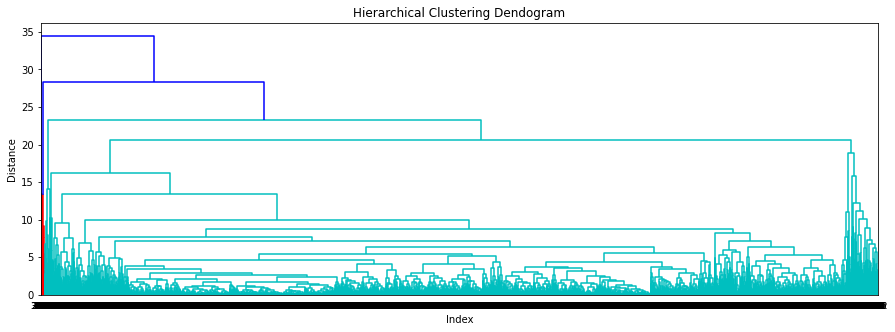

In [31]:
plt.figure(figsize=(15,5));
plt.title("Hierarchical Clustering Dendogram");
plt.xlabel("Index");
plt.ylabel("Distance");
sch.dendrogram(z,leaf_rotation=0,leaf_font_size=8);

In [32]:
from sklearn.cluster import AgglomerativeClustering
h_clust=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='complete').fit(df_new)
cluster_labels=pd.Series(h_clust.labels_)
df["clust"]=cluster_labels

In [33]:
df.tail()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0
3998,4021,3016,0,1,1,1,0,0,0,0,1398,0,0


In [34]:
z=linkage(df_new,method='centroid',metric='euclidean')

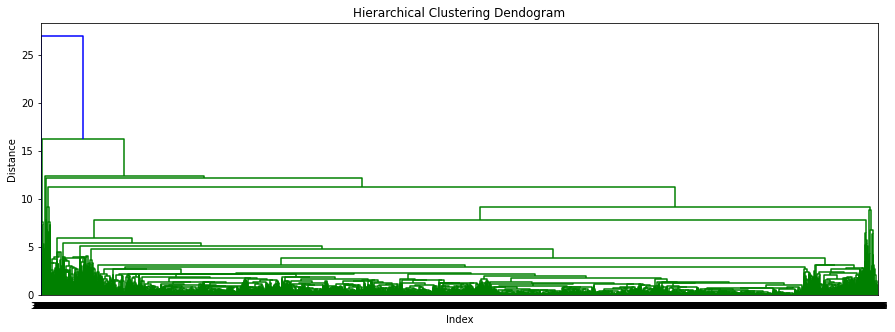

In [35]:
plt.figure(figsize=(15,5));
plt.title("Hierarchical Clustering Dendogram");
plt.xlabel("Index");
plt.ylabel("Distance");
sch.dendrogram(z,leaf_rotation=0,leaf_font_size=8);

In [39]:
z=linkage(df_new,method='average',metric='euclidean')

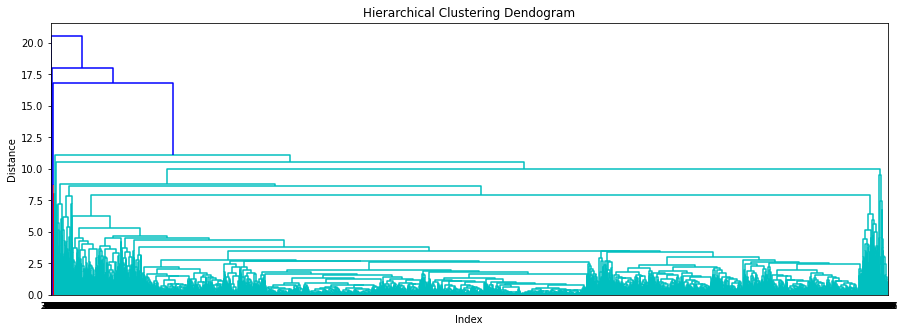

In [40]:
plt.figure(figsize=(15,5));
plt.title("Hierarchical Clustering Dendogram");
plt.xlabel("Index");
plt.ylabel("Distance");
sch.dendrogram(z,leaf_rotation=0,leaf_font_size=8);

In [41]:
from sklearn.cluster import AgglomerativeClustering
h_clust=AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='average').fit(df_new)
cluster_labels=pd.Series(h_clust.labels_)
df["clust_3"]=cluster_labels

In [42]:
z=linkage(df_new,method='complete',metric='correlation')

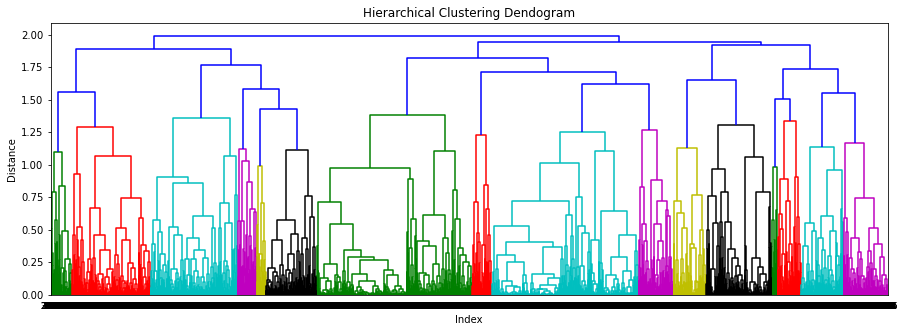

In [43]:
plt.figure(figsize=(15,5));
plt.title("Hierarchical Clustering Dendogram");
plt.xlabel("Index");
plt.ylabel("Distance");
sch.dendrogram(z,leaf_rotation=0,leaf_font_size=8);

In [49]:
from sklearn.cluster import AgglomerativeClustering
h_clust=AgglomerativeClustering(n_clusters=7,affinity='correlation',linkage='complete').fit(df_new)
cluster_labels=pd.Series(h_clust.labels_)
df["clust4"]=cluster_labels

In [51]:
df.tail()

,clust,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust4
3994,0,18476,0,1,1,1,8525,4,200,1,1403,1,4
3995,0,64385,0,1,1,1,981,5,0,0,1395,1,4
3996,0,73597,0,3,1,1,25447,8,0,0,1402,1,3
3997,0,54899,0,1,1,1,500,1,500,1,1401,0,2
3998,0,3016,0,1,1,1,0,0,0,0,1398,0,2


In [46]:
df=df.iloc[:,[14,13,12,1,2,3,4,5,6,7,8,9,10,11]]

In [52]:
df.head()

,clust,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust4
0,0,28143,0,1,1,1,174,1,0,0,7000,0,5
1,0,19244,0,1,1,1,215,2,0,0,6968,0,5
2,0,41354,0,1,1,1,4123,4,0,0,7034,0,5
3,0,14776,0,1,1,1,500,1,0,0,6952,0,5
4,0,97752,0,4,1,1,43300,26,2077,4,6935,1,6


In [48]:
df.to_csv("crime_data.csv",encoding="utf-8")